1. Imported Needed Libraries

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

2. Clean Text

In [15]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve,processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program.People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""
#---------------------------------------------------------------------------------
#Remove Special Character
sentences = re.sub('[^A-Za-z0-9]+' , ' ', sentences)
#----------------------------------------------------------------------------------
# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
#---------------------------------------------------------------------------------
sentences = sentences.lower()
#--------------------------------------------------------------------------------
words = sentences.split()
#-------------------------------------------------------------------------------
vocab = set(words)
#------------------------------------------------------------------------------
word_to_ix = {word :i for i , word in enumerate(vocab)}
#------------------------------------------------------------------------------
ix_to_word = {i: word for i, word in enumerate(vocab)}
#------------------------------------------------------------------------------

1. Detect The Number Of Vocabulary
2. Put Embedded Dimensonal
3. Put Context_Size(Window)

In [16]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

4. Data BAG OF WORDS (BOW)

* data - [(context), target]

 """We are about to study the idea of a computational process. Computational processes are abstract beings that inhabit computers.As they evolve, processes manipulate other abstract things called data.The evolution of a process is directed by a pattern of rules called a program. People create programs to direct processes. In effect,we conjure the spirits of the computer with our spells."""


In [17]:
data = [] # Create Empty List
for i in range (context_size , len(words) -context_size): #Put Context = 2 & target = (len_words) -2
    context =[words[i-context_size],words[i-1],words[i+1] ,words[i+context_size]]
    target = words[i]
    data.append((context,target))
print(data[:5],'\n')

[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')] 



5. Create Embedding Matrix

In [18]:
embeddings = np.random.random_sample((vocab_size,embed_dim))
print('The Embeddings Shape Are --> ', embeddings.shape) # The Embeddings Shape Are -->  (43, 10)
embeddings
#قيم هذه عبارة عن --> Weights

The Embeddings Shape Are -->  (43, 10)


array([[0.85437359, 0.80689221, 0.73330112, 0.38235547, 0.49536942,
        0.2401625 , 0.13990554, 0.01468058, 0.56302912, 0.42771957],
       [0.33905203, 0.0272593 , 0.42952758, 0.22014403, 0.9180435 ,
        0.57474669, 0.90375675, 0.19886172, 0.8226924 , 0.47960482],
       [0.58336877, 0.4080421 , 0.65679291, 0.97488546, 0.09333837,
        0.42001485, 0.57705184, 0.4818702 , 0.14032523, 0.37780313],
       [0.17454872, 0.91458853, 0.98142883, 0.12407073, 0.22220446,
        0.02427534, 0.88030917, 0.54773835, 0.24657744, 0.07793297],
       [0.88546173, 0.68808102, 0.56845335, 0.52578119, 0.640949  ,
        0.69516182, 0.60414036, 0.37406406, 0.7320943 , 0.13011467],
       [0.02119659, 0.51055058, 0.56685262, 0.33948493, 0.50383675,
        0.28134475, 0.8843916 , 0.24948764, 0.21012598, 0.85438192],
       [0.5949054 , 0.50048547, 0.95169159, 0.13780424, 0.2077537 ,
        0.47582808, 0.98833239, 0.15554947, 0.13434002, 0.11814991],
       [0.32236133, 0.51820057, 0.3291384

* **Word2Vec Is Simaple Neural Network Consist of 2 Layers Only**

6. Create Function Because Use In Neural Network

In [19]:
def linear(m ,theta):
  w = theta
  return m.dot(w)

7. Create Log Softmax

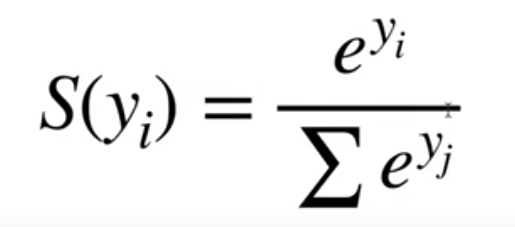

In [20]:
from numpy.random.mtrand import exponential
def log_softmax(value):
  exponential_value = np.exp(value - np.max(value))
  return np.log(exponential_value / exponential_value.sum())

8. create NLLloss

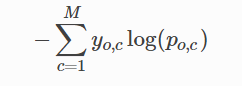

In [21]:
def NLLloss(logs,targets):
  output_value = logs[range(len(targets)),targets]
  return - output_value.sum()/len(output_value)

9. Create Log softmax_crossentropy

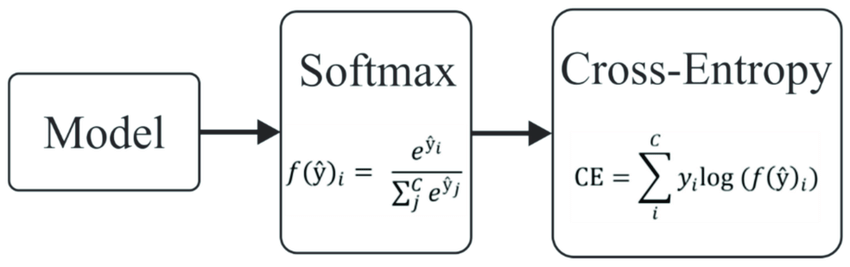

In [22]:
def log_softmax_cross_entropy(logits,target):
  output_value = np.zeros_like(logits)
  output_value[np.arange(len(logits)),target] = 1
  softmax = np.exp(logits) / np.exp(logits).sum(axis = -1 , keepdims = True)
  return (- output_value + softmax)/ logits.shape[0]

10. Make Data Forward Propagartion

In [23]:
def forward(context_idx,theta):
  rows = embeddings[context_idx].reshape(1,-1) #معناها ان هاتهم كلهم لي في فيكتور واحد ، ام بالنسبة لععد الاعمدة فا -1 تعني انه مسموح بعدد لانهائي ممكن يام وضعه
  values = linear(rows,theta)
  output = log_softmax(values)
  return rows , values , output

11. Create Data Backpropagation

In [24]:
def back_propagation(preds , theta , target_idx):
  # Preds --> Predicted Value , Theta --> Weights  , Target_index --> Correct Value
  rows,values,output = preds
  dervative_log = log_softmax_cross_entropy(values,target_idx)
  dervative_weights = rows.T.dot(dervative_log)
  return dervative_weights

12. Create Optimizing Function

In [29]:
def optimize(theta,gradient,leraning_rate = 0.03):
  theta -= gradient * leraning_rate
  return theta

13. Create Training Function
* Uniform  --> تجيب ارقام عشوائية ماشية بتوزيع معين

In [26]:
theta = np.random.uniform(-1 ,1 , (2 * context_size * embed_dim , vocab_size))

In [32]:
epoch_losses = {}
for epoch in range(80):
  losses = []
  for context , target in data :
    context_idxs = np.array([word_to_ix[w] for w in context])
    preds = forward(context_idxs , theta)
    target_idxs = np.array([word_to_ix[target]])
    loss = NLLloss(preds[-1], target_idxs)
    losses.append(loss)
    gradient_value = back_propagation(preds , theta, target_idxs)
    theta = optimize(theta,gradient_value)
  epoch_losses[epoch] = losses

14. Plot Loss/epoch

Text(0, 0.5, 'Losses')

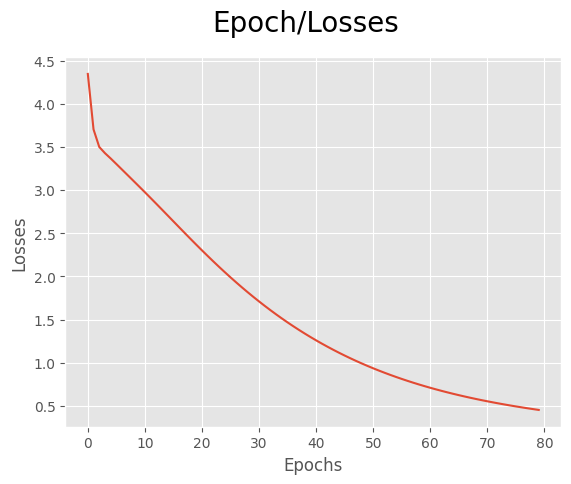

In [34]:
ix = np.arange(0,80)
plt.style.use('ggplot')
fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

15. Create Predict Function

In [35]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    return word

In [36]:
# (['we', 'are', 'to', 'study'], 'about')
predict(['we', 'are', 'to', 'study'])

'about'

16. Accuracy

In [38]:
def accuracy():
    wrong = 0
    for context, target in data:
        if(predict(context) != target):
            wrong += 1
    return (1 - (wrong / len(data)))
accuracy()

1.0